# Ejercicios Graphs, Paths & Components

Ejercicios básicos de Grafos.

## Ejercicio - Número de Nodos y Enlaces

(resuelva en código propio y usando la librería NerworkX o iGraph)

Cuente en número de nodos y enalces con los siguientes links (asumiendo que el grafo puede ser dirigido y no dirigido)


In [1]:
edges = set([(1, 2), (3, 1), (3, 2), (2, 4)])

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import itertools

### Usando la libreria

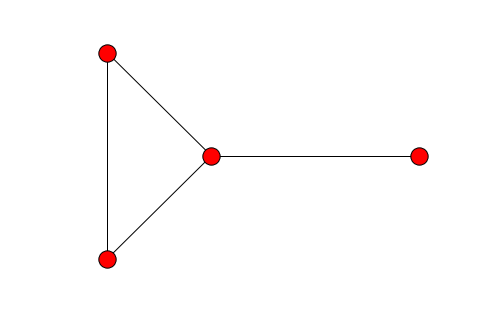

('The graph is directed?: ', False)
('Number of edges: ', 8)
('Number of nodes: ', 4)


In [54]:
gr = nx.Graph()
for i in range(1,5):
    gr.add_node(i)
for i in edges:
    gr.add_edge(i[0], i[1])
    
nx.draw_spectral(gr)

plt.show()

print ('The graph is directed?: ', nx.is_directed(gr))
if nx.is_directed(gr) is True:
    print ('Number of edges: ', gr.number_of_edges())
else:
    print ('Number of edges: ', gr.number_of_edges()*2)

print ('Number of nodes: ', gr.number_of_nodes())

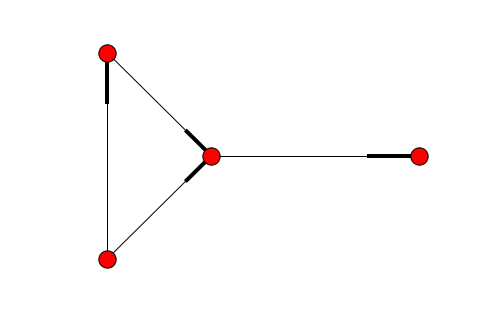

('The graph is directed?: ', True)
('Number of edges: ', 4)
('Number of nodes: ', 4)


In [49]:
gr2 = nx.DiGraph()
for i in range(1,5):
    gr2.add_node(i)
for i in edges:
    gr2.add_edge(i[0], i[1])

nx.draw_spectral(gr2)

plt.show()

print ('The graph is directed?: ', nx.is_directed(gr2))
if nx.is_directed(gr2) is True:
    print ('Number of edges: ', gr2.number_of_edges())
else:
    print ('Number of edges: ', gr2.number_of_edges()*2)

print ('Number of nodes: ', gr2.number_of_nodes())

### Propio

In [59]:
Directed=False
print ('The graph is directed?: ', Directed)

if Directed is True:
    print ('Number of edges: ', len(edges))
else:
    print ('Number of edges: ', 2*len(edges))

temp = []
for i in edges:
    temp.append(i[0])
    temp.append(i[1])
temp = np.array(temp)

print ('Number of nodes: ', np.size(np.unique(temp)))


('The graph is directed?: ', False)
('Number of edges: ', 8)
('Number of nodes: ', 4)


In [60]:
Directed=True
print ('The graph is directed?: ', Directed)

if Directed is True:
    print ('Number of edges: ', len(edges))
else:
    print ('Number of edges: ', 2*len(edges))

temp = []
for i in edges:
    temp.append(i[0])
    temp.append(i[1])
temp = np.array(temp)

print ('Number of nodes: ', np.size(np.unique(temp)))


('The graph is directed?: ', True)
('Number of edges: ', 4)
('Number of nodes: ', 4)


In [112]:
del temp, Directed, edges

NameError: name 'temp' is not defined

## Ejercicio - Matriz de Adyacencia

(resuelva en código propio y usando la librería NetworkX (python) o iGraph (R))

Cree la matriz de adyacencia del grafo del ejercicio anterior (para dirigido y no-dirigido)

### Usando Librería

In [67]:
A = nx.adjacency_matrix(gr)
print ('No Dirigida')
print(A)

No Dirigida
  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (3, 1)	1


In [68]:
A = nx.adjacency_matrix(gr2)
print ('Dirigida')
print(A)

Dirigida
  (0, 1)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1


### Propia

In [172]:
def adjmat(ed, directed):
    if directed is True:
        temp_d1 = []
        temp_d2 = []
        for i in ed:
            temp_d1.append(i[0])
            temp_d2.append(i[1])
        B=sc.sparse.csr_matrix((np.ones(len(temp_d1), dtype='int'), (temp_d1, temp_d2)))
    else:
        temp_d1 = []
        temp_d2 = []
        for i in ed:
            temp_d1.append(i[0])
            temp_d1.append(i[1])
            temp_d2.append(i[1])
            temp_d2.append(i[0])
        B=sc.sparse.csr_matrix((np.ones(len(temp_d1), dtype='int'), (temp_d1, temp_d2)))
    return B

In [91]:
A2 = adjmat(edges, True)
print ('Dirigida')
print (A2)

Dirigida
  (1, 2)	1
  (2, 4)	1
  (3, 1)	1
  (3, 2)	1


In [92]:
A2 = adjmat(edges, False)
print ('No Dirigida')
print (A2)

No Dirigida
  (1, 2)	1
  (1, 3)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (3, 1)	1
  (3, 2)	1
  (4, 2)	1


In [ ]:
del A, A2, gr, gr2

## Ejercicio - Sparseness 


### Enron email network  - Directed  http://snap.stanford.edu/data/email-Enron.html

Calcule la proporción entre número de links existentes  contra el número de links posibles.

In [93]:
F = open("Email-Enron.txt",'r')
Net1=nx.read_edgelist(F)
F.close()

In [99]:
n = Net1.number_of_nodes()
posibles = Net1.number_of_nodes()*(Net1.number_of_nodes()-1.0)/2.0
print ('Ratio: ', Net1.number_of_edges()/posibles)

('Ratio: ', 0.00027309755503535)


En la matriz de adyacencia de cada uno de las redes elegidas, cuantos ceros hay?

In [100]:
ANet1 = nx.adjacency_matrix(Net1)

In [105]:
nzeros=Net1.number_of_nodes()*Net1.number_of_nodes()-len(ANet1.data)
print ('La Red tiene: ', nzeros, ' ceros')

('La Red tiene: ', 1345935202, ' ceros')


In [113]:
del Net1, n, posibles, ANet1, nzeros

###  Social circles from Facebook (anonymized) - Undirected http://snap.stanford.edu/data/egonets-Facebook.html

Calcule la proporción entre número de links existentes  contra el número de links posibles.

In [106]:
F = open("facebook_combined.txt",'r')
Net=nx.read_edgelist(F)
F.close()

In [107]:
n = Net.number_of_nodes()
posibles = Net.number_of_nodes()*(Net.number_of_nodes()-1.0)/2.0
print ('Ratio: ', Net.number_of_edges()/posibles)

('Ratio: ', 0.010819963503439287)


En la matriz de adyacencia de cada uno de las redes elegidas, cuantos ceros hay?

In [109]:
ANet = nx.adjacency_matrix(Net)

In [110]:
nzeros=Net.number_of_nodes()*Net.number_of_nodes()-len(ANet.data)
print ('La Red tiene: ', nzeros, ' ceros')

('La Red tiene: ', 16137053, ' ceros')


In [115]:
del Net, n, posibles, ANet, nzeros

###   Webgraph from the Google programming contest, 2002 - Directed   http://snap.stanford.edu/data/web-Google.html

Calcule la proporción entre número de links existentes  contra el número de links posibles.

In [116]:
F = open("web-Google.txt",'r')
Net=nx.read_edgelist(F)
F.close()

In [117]:
n = Net.number_of_nodes()
posibles = Net.number_of_nodes()*(Net.number_of_nodes()-1.0)/2.0
print ('Ratio: ', Net.number_of_edges()/posibles)

('Ratio: ', 1.1271891119695635e-05)


En la matriz de adyacencia de cada uno de las redes elegidas, cuantos ceros hay?

In [118]:
ANet = nx.adjacency_matrix(Net)

In [119]:
nzeros=Net.number_of_nodes()*Net.number_of_nodes()-len(ANet.data)
print ('La Red tiene: ', nzeros, ' ceros')

('La Red tiene: ', 766864614267, ' ceros')


In [120]:
del Net, n, posibles, ANet, nzeros

## Ejercicio - Redes Bipartitas
Defina una red bipartita y genere ambas proyecciones, explique qué son los nodos y links tanto de la red original como de las proyeccciones

Se define una red donde los nodes E1, E2 y E3 son Estaciones de Bus, y se definen los nodos R101, R250, R161, R131 y R452 como rutas de buses.

In [96]:
B = nx.Graph()
B.add_nodes_from(['E1','E2', 'E3'], bipartite=0)
B.add_nodes_from(['R250', 'R161', 'R131', 'R452','R101'], bipartite=1)
B.add_edges_from([('E1', 'R250'), ('E1', 'R452'), ('E3', 'R250'), ('E3', 'R131'), ('E3', 'R161'), ('E3', 'R452'), ('E2', 'R161'), ('E2', 'R101'),('E1', 'R131')])
B1=nx.algorithms.bipartite.projected_graph(B, ['E1','E2', 'E3'])
B2=nx.algorithms.bipartite.projected_graph(B,['R250', 'R161', 'R131', 'R452'])


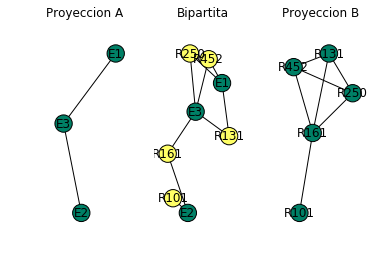

In [97]:
value =np.zeros(len(B.nodes()))
i = 0
for node in B.nodes():
    if  any(node == a for a in B1.nodes()):
        value[i] = 0.25
    if  any(node == a for a in B2.nodes()):
        value[i] = 0.75   
    i += 1


fig, ax = plt.subplots(1, 3, num=1)
plt.sca(ax[1])
ax[1].set_title('Bipartita')
nx.draw(B,  with_labels = True, cmap=plt.get_cmap('summer'), node_color=value)
plt.sca(ax[0])
ax[0].set_title('Proyeccion A')
nx.draw(B1,  with_labels = True, cmap=plt.get_cmap('summer'), node_color=np.ones(len(B1.nodes()))*0.25)
plt.sca(ax[2])
nx.draw(B2,  with_labels = True, cmap=plt.get_cmap('summer'), node_color=0.75*np.ones(len(B2.nodes())))
ax[2].set_title('Proyeccion B')

plt.show()



La proyección A representa la comunicación entre Estaciones mediante el flujo de las rutas de buses, La proyección B representa la posible interacción o "encuentros" entre las rutas de buses en función de las estaciones.


## Ejercicio - Paths

Cree un grafo de 5 nodos con 5 enlaces. Elija dos nodos cualquiera e imprima:

    5 Paths diferentes entre los nodos
    El camino mas corto entre los nodos
    El diámetro de la red
    Un self-avoiding path



In [116]:
Nodes = [1, 2, 3, 4, 5]
nEdges = 5

In [119]:
temp = []
for subset in itertools.combinations(Nodes, 2):
    temp.append(subset)
Edges = random.sample(temp, nEdges)

In [203]:
Edges

array([[2, 5],
       [1, 4],
       [3, 4],
       [1, 3],
       [2, 3]])

In [210]:
Grafo = {
     1 : []
   , 2 : []
   , 3 : []
   , 4 : []
   , 5 : []
    
}
for i in Edges:
    Grafo[i[0]].append(i[1])
    Grafo[i[1]].append(i[0])


In [245]:
def pathGen(Inicio, Fin):

    flag=False

    actual = Inicio
    temp = []
    cont = 0
    while not flag:
        temp.append(actual)
        actual = random.sample(Grafo[actual], 1)[0]
        if actual == Fin:
            flag = True
            temp.append(actual)
            break  
    return temp

In [246]:
print "Un posible path entre el nodo 5 y 4 es: ", pathGen(5,4)
print "Un posible path entre el nodo 5 y 4 es: ", pathGen(5,4)
print "Un posible path entre el nodo 5 y 4 es: ", pathGen(5,4)
print "Un posible path entre el nodo 5 y 4 es: ", pathGen(5,4)
print "Un posible path entre el nodo 5 y 4 es: ", pathGen(5,4)

Un posible path entre el nodo 5 y 4 es:  [5, 2, 5, 2, 5, 2, 3, 1, 4]
Un posible path entre el nodo 5 y 4 es:  [5, 2, 3, 2, 3, 2, 3, 2, 3, 2, 5, 2, 3, 2, 3, 2, 5, 2, 3, 4]
Un posible path entre el nodo 5 y 4 es:  [5, 2, 5, 2, 5, 2, 3, 4]
Un posible path entre el nodo 5 y 4 es:  [5, 2, 3, 2, 5, 2, 5, 2, 5, 2, 3, 4]
Un posible path entre el nodo 5 y 4 es:  [5, 2, 3, 1, 4]


In [212]:
visited = {i : False for i in xrange(1, 6)}

def shortest(a, b, length = 0):
    global visited, Grafo
    if b == a : return length
   
    minL = float('inf')
    for v in Grafo[a]:
        if not visited[v]:
            visited[v] = True
            minL = min(minL, 1 + shortest(v, b))
            visited[v] = False
    return minL

print 'El camino mas corto entre los nodos 5 y 4 es: ', shortest(5, 4)

El camino mas corto entre los nodos 5 y 4 es:  3


In [251]:
temp = []

for subset in itertools.combinations(Nodes, 2):
    temp.append(subset)

maxL = 0
for i in temp:
    maxL=max(maxL,shortest(i[0], i[1]))
print 'La diametro de la Red es, ', maxL

La diametro de la Red es,  3


In [258]:
def avoidpathGen(Inicio, Fin):

    flag=False

    actual = Inicio
    temp = []
    past = []
    cont = 0
    while not flag:
        temp.append(actual)
        past.append(actual)
        temp2 = random.sample(Grafo[actual], 1)[0]
        while not len(np.intersect1d(past,temp2)) == 0:
            temp2 = random.sample(Grafo[actual], 1)[0]
        actual = temp2
        if actual == Fin:
            flag = True
            temp.append(actual)
            break  
    return temp

In [304]:
print 'Un self-avoiding path del nodo 2 a 4 es: ', avoidpathGen(2,4)

Un self-avoiding path del nodo 2 a 4 es:  [2, 3, 1, 4]



## Ejercicio - Componentes
Baje una red real (http://snap.stanford.edu/data/index.html) y lea el archivo


Enron email network  - Directed  http://snap.stanford.edu/data/email-Enron.html

In [308]:
F = open("Email-Enron.txt",'r')
Net1=nx.read_edgelist(F)
F.close()

In [314]:
nx.number_connected_components(Net1)

1065

TypeError: 'module' object is not callable